In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import requests, os, io

# Data Exploration and Visualization of the Food-world-cup data from fivethirtyeight

We will download the data from github

In [127]:
# Repo: https://github.com/fivethirtyeight/data/tree/master/food-world-cup

url="https://raw.githubusercontent.com/fivethirtyeight/data/master/food-world-cup/food-world-cup-data.csv"

if not os.path.isfile('./data/data.csv'):
    print('Downloading file')
    download = requests.get(url).content
    with open('./data/data.csv','w+') as f:
        f.write(download.decode('ISO-8859-1'))

# Reading the downloaded content and turning it into a pandas dataframe

df = pd.read_csv('./data/data.csv',na_values='NaN')

We look at the data to see if we have read the csv properly

In [128]:
df.head()

,RespondentID,"Generally speaking, how would you rate your level of knowledge�of cuisines from different parts of the world?","How much, if at all, are you interested in cuisines from different parts of the world?",Please rate how much you like the traditional cuisine of Algeria:,Please rate how much you like the traditional cuisine of Argentina.,Please rate how much you like the traditional cuisine of�Australia.,Please rate how much you like the traditional cuisine of Belgium.,Please rate how much you like the traditional cuisine of Bosnia and Herzegovina.,Please rate how much you like the traditional cuisine of Brazil.,Please rate how much you like the traditional cuisine of Cameroon.,...,Please rate how much you like the traditional cuisine of Turkey.,Please rate how much you like the traditional cuisine of Cuba.,Please rate how much you like the traditional cuisine of Ethiopia.,Please rate how much you like the traditional cuisine of Vietnam.,Please rate how much you like the traditional cuisine of Ireland.,Gender,Age,Household Income,Education,Location (Census Region)
0,3308895255,Intermediate,Some,NaN,3.0,5.0,4.0,NaN,3.0,NaN,...,NaN,NaN,3.0,NaN,4.0,Male,18-29,"$100,000 - $149,999",Less than high school degree,West South Central
1,3308891308,Novice,Some,NaN,NaN,3.0,3.0,NaN,3.0,NaN,...,NaN,NaN,NaN,NaN,4.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West South Central
2,3308891135,Intermediate,A lot,3.0,4.0,NaN,3.0,NaN,4.0,5.0,...,NaN,4.0,5.0,4.0,3.0,Male,30-44,"$50,000 - $99,999",Graduate degree,Pacific
3,3308879091,Novice,Not much�,NaN,3.0,NaN,3.0,NaN,NaN,3.0,...,3.0,4.0,NaN,4.0,3.0,Male,45-60,"$0 - $24,999",Less than high school degree,New England
4,3308871671,Novice,Not much�,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,3.0,NaN,3.0,NaN,Male,30-44,"$25,000 - $49,999",High school degree,Pacific


In [129]:
print(len(df.columns),df.columns,sep='\n')

48
Index(['RespondentID',
       'Generally speaking, how would you rate your level of knowledge�of cuisines from different parts of the world?',
       'How much, if at all, are you interested in cuisines from different parts of the world?',
       'Please rate how much you like the traditional cuisine of Algeria:',
       'Please rate how much you like the traditional cuisine of Argentina.',
       'Please rate how much you like the traditional cuisine of�Australia.',
       'Please rate how much you like the traditional cuisine of Belgium.',
       'Please rate how much you like the traditional cuisine of Bosnia and Herzegovina.',
       'Please rate how much you like the traditional cuisine of Brazil.',
       'Please rate how much you like the traditional cuisine of Cameroon.',
       'Please rate how much you like the traditional cuisine of Chile.',
       'Please rate how much you like the traditional cuisine of Colombia.',
       'Please rate how much you like the traditional c

It seems we have many columns. Let's limit your exploration to few countries before we proceed.

In [130]:
# countries=['Brazil','Italy','Greece','England','Germany','Iran','Ireland','France','Cameroon','China','India','Spain','Mexico','Japan','Russia','Portugal','Thailand']
countries = ['Italy','Mexico','China','France','Japan','Germany','India']
countries_columns=['Please rate how much you like the traditional cuisine of {}.'.format(s) for s in countries]
common_columns=['Gender','Age','Household Income','Education','Location (Census Region)']
columns=countries_columns+common_columns

In [131]:
df_interested = df[columns]

In [132]:
df_interested.head()

,Please rate how much you like the traditional cuisine of Italy.,Please rate how much you like the traditional cuisine of Mexico.,Please rate how much you like the traditional cuisine of China.,Please rate how much you like the traditional cuisine of France.,Please rate how much you like the traditional cuisine of Japan.,Please rate how much you like the traditional cuisine of Germany.,Please rate how much you like the traditional cuisine of India.,Gender,Age,Household Income,Education,Location (Census Region)
0,5.0,5.0,4.0,3.0,1.0,5.0,5.0,Male,18-29,"$100,000 - $149,999",Less than high school degree,West South Central
1,5.0,5.0,2.0,4.0,3.0,4.0,2.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West South Central
2,5.0,4.0,3.0,4.0,3.0,2.0,5.0,Male,30-44,"$50,000 - $99,999",Graduate degree,Pacific
3,3.0,4.0,4.0,3.0,3.0,3.0,3.0,Male,45-60,"$0 - $24,999",Less than high school degree,New England
4,4.0,4.0,3.0,3.0,2.0,3.0,3.0,Male,30-44,"$25,000 - $49,999",High school degree,Pacific


Let's keep the dataframe's column names much simpler. Since they all are rating (from 1-5, where 1:late this country's cuisine, 5:love this country's cuisine,N/A: they are unfamiliar), we will strip down and keep the country name alone

In [133]:
df_interested.columns = countries+common_columns

## Let's try to answer some questions about this survey

1. Which country's cuisine is the most loved ?
2. Does age have an effect on the cuisine someone hates ?
3. Does household income have an effect on the cuisine someone loves ?
4. What are the top 5 cuisines that are hated by the most educated respondents ?


# The issue of N/A

Given the subset of cuisine we have selected ( of course we have expand this selection to include all countries ), we will first sum up the rating. Since rating 5 means a respondent loves this cuisine, and rating 1 means they hate it. this can act as a kind of score. 
However in this dataset, there are respondents who are unfamiliar with a country's cuisine that they didnt give an rating. This can skew our analysis

| Respondent | Australia | Italy |
|------------|-----------|-------|
| A          | 5         |       |
| B          |           | 1     |
| C          |           | 3     |
| D          | 4         |       |
| E          |           | 1     |
| F          |           | 1     |
| G          |           | 1     |

Given this scenario, if you were to sum up the rating/score, it would mean that Australia is the most liked cuisine inspite of only 2 responses.
So let's try and clean/normalize this data.

we can make some assumptions here as to how we want to treat this NaN value.
1. we can drop records where at least 1 of the column value is NaN --> Most records have NaN values for 1 or more columns, if we remove them we end up with barely any data.
2. we can assign 3 which acts like an average rating --> Which will mean countries where are not responses would get an average rating overal which have not be true.
3. We can assign 0 which will not have any impact and maybe scale the score (change the range from 1 <-> 5 to -5 <-> 5 ) for each response. For now let's keep it simple. 



In [134]:
# Clean option 1
df.isna().sum()

RespondentID                                                                                                        0
Generally speaking, how would you rate your level of knowledge�of cuisines from different parts of the world?       0
How much, if at all, are you interested in cuisines from different parts of the world?                              0
Please rate how much you like the traditional cuisine of Algeria:                                                1185
Please rate how much you like the traditional cuisine of Argentina.                                               903
Please rate how much you like the traditional cuisine of�Australia.                                               890
Please rate how much you like the traditional cuisine of Belgium.                                                 899
Please rate how much you like the traditional cuisine of Bosnia and Herzegovina.                                 1217
Please rate how much you like the traditional cuisine of

In [135]:
df_interested = df_interested.fillna(0).copy()

In [136]:
df_interested = df_interested.merge(df['Generally speaking, how would you rate your level of knowledge�of cuisines from different parts of the world?'],left_index=True,right_index=True)
df_interested = df_interested.rename(columns={'Generally speaking, how would you rate your level of knowledge�of cuisines from different parts of the world?':'expertise'})
df_interested.head()

,Italy,Mexico,China,France,Japan,Germany,India,Gender,Age,Household Income,Education,Location (Census Region),expertise
0,5.0,5.0,4.0,3.0,1.0,5.0,5.0,Male,18-29,"$100,000 - $149,999",Less than high school degree,West South Central,Intermediate
1,5.0,5.0,2.0,4.0,3.0,4.0,2.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West South Central,Novice
2,5.0,4.0,3.0,4.0,3.0,2.0,5.0,Male,30-44,"$50,000 - $99,999",Graduate degree,Pacific,Intermediate
3,3.0,4.0,4.0,3.0,3.0,3.0,3.0,Male,45-60,"$0 - $24,999",Less than high school degree,New England,Novice
4,4.0,4.0,3.0,3.0,2.0,3.0,3.0,Male,30-44,"$25,000 - $49,999",High school degree,Pacific,Novice


In [137]:
df_interested['expertise'].value_counts()

Intermediate    609
Novice          547
Advanced        190
Expert           27
Name: expertise, dtype: int64

In [138]:
df_interested['expertise'] = df_interested['expertise'].map({'Novice':1,'Intermediate':1.5,'Advanced':2,'Expert':2.5})
df_interested[countries] = df_interested[countries].multiply(df_interested['expertise'],axis="index")
df_scaled = df_interested.drop('expertise',axis=1)
df_scaled.head()

,Italy,Mexico,China,France,Japan,Germany,India,Gender,Age,Household Income,Education,Location (Census Region)
0,7.5,7.5,6.0,4.5,1.5,7.5,7.5,Male,18-29,"$100,000 - $149,999",Less than high school degree,West South Central
1,5.0,5.0,2.0,4.0,3.0,4.0,2.0,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West South Central
2,7.5,6.0,4.5,6.0,4.5,3.0,7.5,Male,30-44,"$50,000 - $99,999",Graduate degree,Pacific
3,3.0,4.0,4.0,3.0,3.0,3.0,3.0,Male,45-60,"$0 - $24,999",Less than high school degree,New England
4,4.0,4.0,3.0,3.0,2.0,3.0,3.0,Male,30-44,"$25,000 - $49,999",High school degree,Pacific


# 1. Which country's cuisine is the most loved ?

This should be straight forward. we need to sum the score of each columns


In [139]:
# Get the sum of scores of each country and divide by the total scores of these countries
# to represent in a 0 <-> 100 scale
df_most_liked = df_scaled[countries].sum()*100/df_scaled[countries].sum().sum()
df_most_liked = df_most_liked.sort_values(ascending=False)

In [140]:
n=1
top_index = np.argsort(df_most_liked.values)[-n-1:-n+1] if np.argsort(df_most_liked.values)[-n-1:-n+1].size >0 else [0,1]
top_n = (df_most_liked[top_index[0]] + df_most_liked[top_index[1]])/2
colors=np.where(df_most_liked>=top_n, 'g', 'r')


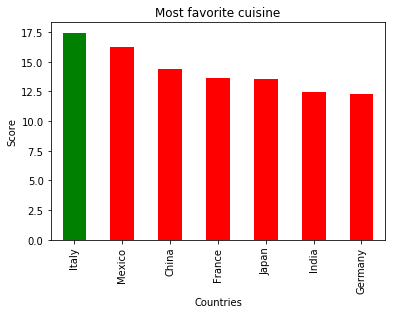

In [141]:
df_most_liked.plot(kind='bar',title='Most favorite cuisine',xlabel='Countries',ylabel='Score',color=colors)

It is clear that Italy's cuisine is the most favorite by scoring(scaled as %) the most highest.

# 2. Does age have an effect on the cuisine someone hates ?

We can group our dataframe by age to calculate the scores

In [142]:
df_age_scaled = df_scaled[df_scaled['Age']!=0]
df_age_scaled = df_age_scaled.groupby('Age').mean()
df_age_scaled

,Italy,Mexico,China,France,Japan,Germany,India
Age,,,,,,,
18-29,5.765267,5.391221,4.562977,4.158397,4.383588,3.715649,4.059160
30-44,6.260586,5.986971,4.967427,4.755700,4.970684,4.397394,4.806189
45-60,5.675362,5.298551,4.831884,4.546377,4.415942,3.923188,4.008696
> 60,5.821538,4.935385,4.684615,4.866154,4.272308,4.398462,3.626154


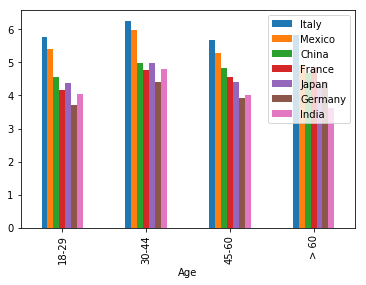

In [143]:
df_age_scaled.plot.bar()

After grouping our scores by age, though there may be slight difference, but among different age group we can see the original trend of score pointing the observation in question 1. So we can conclude that age does not have any significant effect on the cuisine someone loves or hates

# 3. Does household income have an effect on the cuisine someone loves ?


In [144]:
df_income_scaled = df_scaled[df_scaled['Household Income']!=0]
df_income_scaled = df_income_scaled.groupby('Household Income').mean()
df_income_scaled

,Italy,Mexico,China,France,Japan,Germany,India
Household Income,,,,,,,
"$0 - $24,999",5.318841,5.047101,4.231884,3.706522,3.804348,3.442029,3.797101
"$100,000 - $149,999",6.124224,5.593168,5.090062,4.813665,4.714286,4.549689,4.282609
"$150,000+",6.548000,5.872000,5.300000,5.432000,5.352000,4.876000,4.828000
"$25,000 - $49,999",6.047619,5.469048,4.788095,4.535714,4.619048,4.090476,4.004762
"$50,000 - $99,999",5.748437,5.448437,4.692188,4.571875,4.359375,4.165625,4.053125


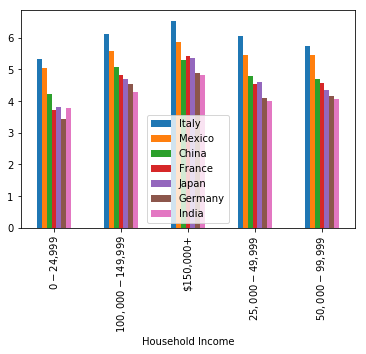

In [145]:
df_income_scaled.plot.bar()

We can make a similar observation as we did in previous question. That household income does not have significant effect on the cuisine someone loves or hates

# 4. What are the top 5 cuisines that are hated by the most educated respondents ?

Given that we have only selected a few countries for our selection, we can not really describe the cuisine someone dislikes. Also the fact that we have missing data and some assumptions on top, this part of the analysis could be incomplete. Nevertheless, we can group by educational level of our respondents to see if there are any trends appearing

In [155]:
df_education_scaled = df_scaled[df_scaled['Education']!=0]
df_education_scaled = df_education_scaled.groupby('Education').mean()
df_education_scaled

,Italy,Mexico,China,France,Japan,Germany,India
Education,,,,,,,
Bachelor degree,6.305699,5.777202,5.155440,5.031088,5.024611,4.477979,4.634715
Graduate degree,6.283077,5.755385,5.180000,5.312308,4.932308,4.550769,4.998462
High school degree,5.117391,4.782609,4.326087,3.608696,3.473913,3.282609,2.808696
Less than high school degree,4.950000,3.700000,3.850000,3.700000,3.125000,3.325000,2.925000
Some college or Associate degree,5.386126,4.951571,4.206806,3.878272,4.014398,3.667539,3.264398


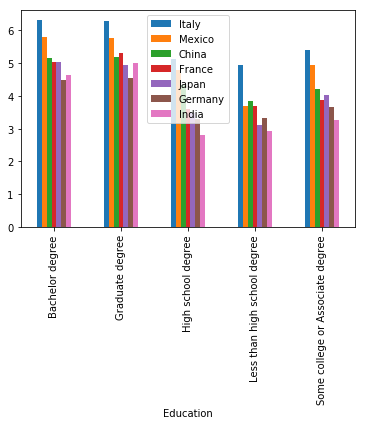

In [156]:
df_education_scaled.plot.bar()

As expected the among different education levels, we see similar trends in favoritism in cuisines. 

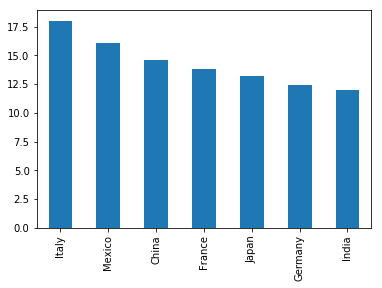

In [161]:
(df_education_scaled.sum(axis=0)*100/df_education_scaled.sum(axis=0).sum()).plot.bar()